In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter("ignore")

## Review

Review in slides.

## New material

### Case study: random sample of newborns

In [4]:
births = Table.read_table('baby.csv')
births.select('Maternal Smoker', 
              'Birth Weight').show(5)

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136


In [5]:
births.select('Maternal Smoker', 
              'Birth Weight').group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


In [6]:
means_table = births.select('Maternal Smoker', 
              'Birth Weight').group('Maternal Smoker',np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


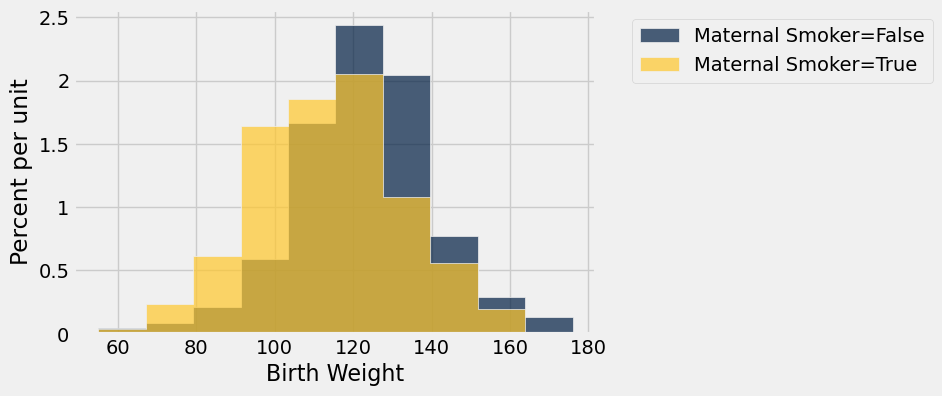

In [9]:
births.select('Maternal Smoker', 
              'Birth Weight').hist('Birth Weight', group='Maternal Smoker')

____

In [10]:
means_table.column(1)

array([ 123.08531469,  113.81917211])

In [11]:
observed_difference = means_table.column(1).item(1)-means_table.column(1).item(0)
observed_difference

-9.266142572024918

### How should we simulate under the null?
- By shuffling the group variable!

In [12]:
births.select('Maternal Smoker').show(5)

Maternal Smoker
False
False
True
True
False


In [13]:
shuffled_group = births.select('Maternal Smoker').sample(with_replacement=False)
shuffled_group.show(5)

Maternal Smoker
True
False
False
True
True


In [14]:
simulated_births = Table().with_columns('Shuffled Maternal Smoker', shuffled_group.column(0),
                                        'Birth Weight', births.column('Birth Weight'))
simulated_births.show(5)

Shuffled Maternal Smoker,Birth Weight
True,120
False,113
False,128
True,108
True,136


In [15]:
simulated_births.group('Shuffled Maternal Smoker',np.average)

Shuffled Maternal Smoker,Birth Weight average
False,119.235
True,119.817


In [16]:
means_array = simulated_births.group('Shuffled Maternal Smoker',np.average).column(1)
means_array

array([ 119.23496503,  119.81699346])

In [17]:
means_array.item(1)-means_array.item(0)

0.5820284290872593

In [19]:
def simulated_difference(table, group_label, numeric_label, function):
    """
    Takes: 
       - name of table
       - column label of numerical variable
       - column label of categorical variable
       - statistic to be calculated (as a function)
       
    Returns: Difference in statistics of the two groups
    """
    shuffled_group = table.select(group_label).sample(with_replacement=False)
    simulated_table = Table().with_columns(group_label, shuffled_group.column(0),
                                        numeric_label, table.column(numeric_label))
    
    stats_array = simulated_table.group(group_label, function).column(1)
    
    
    return stats_array.item(1)-stats_array.item(0)

In [23]:
simulated_difference(births, 'Maternal Smoker', 'Birth Weight', np.average)

-0.37667474138062573

**Discussion Task** [2 min]: 
- Simulate 2500 test statistics under the null hypothesis and save them into an array called `simulated_differences.`

In [26]:
simulated_differences = make_array()
simulations = 2500

In [27]:
for i in np.arange(simulations):
    one_difference = simulated_difference(births, 
                                          'Maternal Smoker', 
                                          'Birth Weight', np.average)
    simulated_differences = np.append(simulated_differences, one_difference)

In [28]:
simulated_differences

array([ 0.7143867 ,  1.2438198 , -0.97049835, ..., -1.02057986,
       -1.60367171,  0.80024072])

Our observed difference of -9.266142572024918 is far away from what we would expect under the null!


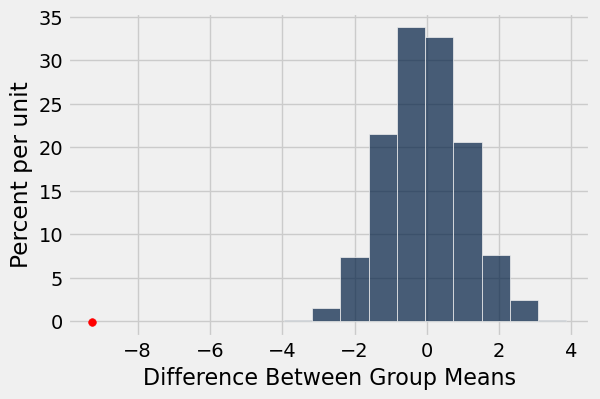

In [29]:
Table().with_column('Difference Between Group Means', 
                    simulated_differences).hist()
plots.scatter(observed_difference, -0.001, color='red', s=30);
print('Our observed difference of ' + str(observed_difference) + ' is far away from what we would expect under the null!')

_________

In [30]:
observed_difference

-9.266142572024918

In [31]:
simulated_differences

array([ 0.7143867 ,  1.2438198 , -0.97049835, ..., -1.02057986,
       -1.60367171,  0.80024072])

In [41]:
np.average(observed_difference >= simulated_differences)

0.0